In [1]:
# ***********************************************************************
#
#  Author: Marybeth Goundry
#  Last Updated: 4/22/2021
# 
#  This program utilizes a CNN to classify the genre of 30 second music clips. Additionally this program utilizes the GTZAN 
#  genre collection of sounds which includes 10 different genres (blues, classical, country, disco, hiphop, jazz, metal, 
#  pop, reggae, and metal) and 100 clips per genre. This program is equipped to classify these sound clips via their 
#  respective audio files or MEL-Spectograms of the audio files. I decided to focus only on classification via audio files. 
#
#  This program is formatted to be able to preform genre classification for all 10 genres as well as only 2 genres. For the 
#  2 genre classification options I have written code for country vs. jazz and rock vs. classical only. All three options
#  can be selected by the user. 
#
#  The program will initally output audio and visualization of the audio, process the audio clips, and split the database of
#  audio clips into training, validation, and testing data to run through the CNN. Once the CNN is done training the user
#  can test it to see if the target genre is the same as the predicted genre.
#  
#
# ***********************************************************************

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import shutil

import os, sys, json, math

import IPython.display as ipd

import librosa.display

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk

from sklearn.model_selection import train_test_split

In [3]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is F414-35FC

 Directory of C:\Users\maryb\Documents\Python3_Programs\Final_Projects\00General

04/30/2021  08:22 PM    <DIR>          .
04/30/2021  08:22 PM    <DIR>          ..
04/23/2021  02:14 PM    <DIR>          .ipynb_checkpoints
03/26/2021  10:57 AM    <DIR>          Data
04/30/2021  08:19 PM       132,340,722 data_10.json
04/30/2021  08:22 PM         2,671,222 MusicGenreClassificationCNN.ipynb
04/23/2021  03:18 PM           140,161 README.docx
               3 File(s)    135,152,105 bytes
               4 Dir(s)  64,054,087,680 bytes free


In [5]:
ans = input("Would you like to classify\n10 genres\n2 genres?\nEnter 10 or 2:")

MUSIC = './Data/genres_original/'
shutil.rmtree('./Data/genres_original/Genres2/', MUSIC) # ensures Genres2 directory is removed

# 10 genre classification
if ans == '10': 
    MUSIC = './Data/genres_original/'# Getting Genres from folder name
    music_dataset = [] # File locations for each wav file 
    genre_target = [] # genre and name of wav file
    for root, dirs, files in os.walk(MUSIC):
        for name in files:
            filename = os.path.join(root, name)
            if filename != './Data/genres_original/jazz\\jazz.00054.wav':
                music_dataset.append(filename)
                genre_target.append(filename.split("/")[3])

# 2 genre classification
elif ans == '2': 
    MUSIC2 = './Data/genres_original/Genres2/'
    ans2 = os.path.exists(MUSIC2)
    
    if ans2 is False:
        directory = "Genres2"
        MUSIC2 = os.path.join(MUSIC, directory)
        os.mkdir(MUSIC2)
    
    opt = input("Would you like to classify\n1: country vs. jazz\n2: rock vs. classical\nEnter 1 or 2:")
    
    # country vs. jazz classification
    if opt == '1': 
        dir1 = './Data/genres_original/Genres2/country'
        ans3 = os.path.exists(dir1)
        if ans3 is False:
            directory1 = "country"
            MUSIC3 = os.path.join(MUSIC2, directory1)
            shutil.copytree('./Data/genres_original/country', MUSIC3)
        
        dir2 = './Data/genres_original/Genres2/jazz'
        ans4 = os.path.exists(dir2)
        if ans4 is False: 
            directory2 = "jazz"
            MUSIC4 = os.path.join(MUSIC2, directory2)       
            shutil.copytree('./Data/genres_original/jazz', MUSIC4)
        
        
            MUSIC2 = './Data/genres_original/Genres2/'
            music_dataset = [] # File locations for each wav file 
            genre_target = [] # genre and name of wav file
            for root, dirs, files in os.walk(MUSIC2):
                for name in files:
                    filename = os.path.join(root, name)
                    if filename != './Data/genres_original/2Genres/jazz\\jazz.00054.wav':
                        music_dataset.append(filename)
                        genre_target.append(filename.split("/")[4])
    
    # rock vs. classical classification 
    elif opt == '2': 
        dir1 = './Data/genres_original/Genres2/rock'
        ans3 = os.path.exists(dir1)
        if ans3 is False:
            directory1 = "rock"
            MUSIC3 = os.path.join(MUSIC2, directory1)
            shutil.copytree('./Data/genres_original/rock', MUSIC3)
        
        dir2 = './Data/genres_original/Genres2/classical'
        ans4 = os.path.exists(dir2)
        if ans4 is False: 
            directory2 = "classical"
            MUSIC4 = os.path.join(MUSIC2, directory2)       
            shutil.copytree('./Data/genres_original/classical', MUSIC4)
        
        
            MUSIC2 = './Data/genres_original/Genres2/'
            music_dataset = [] # File locations for each wav file 
            genre_target = [] # genre and name of wav file
            for root, dirs, files in os.walk(MUSIC2):
                for name in files:
                    filename = os.path.join(root, name)
                    music_dataset.append(filename)
                    genre_target.append(filename.split("/")[4])
    else:
        print("Please input valid numbers")
else:
    print("Please input valid numbers")

Would you like to classify
10 genres
2 genres?
Enter 10 or 2:2
Would you like to classify
1: country vs. jazz
2: rock vs. classical
Enter 1 or 2:2


In [6]:
# Displaying genres 
print(set(genre_target))

{'classical\\classical.00094.wav', 'classical\\classical.00073.wav', 'rock\\rock.00074.wav', 'classical\\classical.00029.wav', 'classical\\classical.00005.wav', 'classical\\classical.00055.wav', 'classical\\classical.00047.wav', 'rock\\rock.00030.wav', 'classical\\classical.00001.wav', 'classical\\classical.00009.wav', 'rock\\rock.00008.wav', 'classical\\classical.00039.wav', 'rock\\rock.00099.wav', 'classical\\classical.00064.wav', 'rock\\rock.00017.wav', 'classical\\classical.00062.wav', 'rock\\rock.00031.wav', 'rock\\rock.00015.wav', 'classical\\classical.00080.wav', 'classical\\classical.00016.wav', 'rock\\rock.00007.wav', 'rock\\rock.00028.wav', 'classical\\classical.00046.wav', 'rock\\rock.00020.wav', 'rock\\rock.00062.wav', 'rock\\rock.00009.wav', 'classical\\classical.00096.wav', 'rock\\rock.00035.wav', 'classical\\classical.00011.wav', 'rock\\rock.00066.wav', 'classical\\classical.00056.wav', 'classical\\classical.00007.wav', 'rock\\rock.00050.wav', 'rock\\rock.00016.wav', 'ro

In [7]:
# Testing Audio Files

audio_path = music_dataset[10]
# img_path = './data/images_original/blues/blues00011.png'

x , sr = librosa.load(audio_path)


librosa.load(audio_path, sr=None)

ipd.Audio(audio_path)

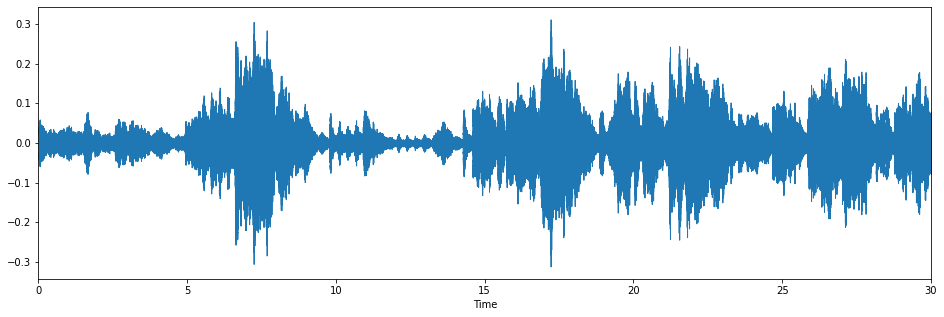

In [8]:
# Visualizing Audio File as a waveform
plt.figure(figsize=(16, 5))
librosa.display.waveplot(x, sr=sr)

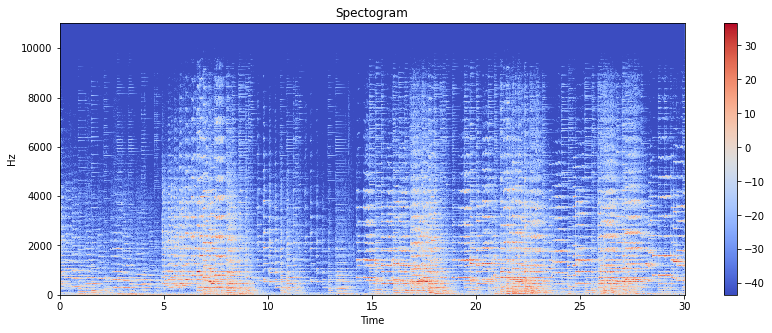

In [9]:
# Visualizing audio file as a spectogram

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectogram')
plt.colorbar()

C:\Users\maryb\anaconda3\envs\music2\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\maryb\anaconda3\envs\music2\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


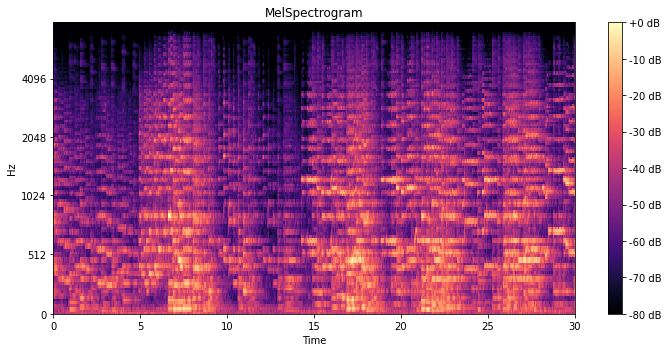

In [10]:
# Visualizing Audio as Mel-Spectogram
file_location = audio_path
y, sr = librosa.load(file_location)
melSpec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()

In [11]:
# 10 genre classification data location
if ans == '10':
    DATASET_PATH = './Data/genres_original'
    avoid = './Data/genres_original\jazz\jazz.00054.wav'

# 2 genre classification data location
else:
    DATASET_PATH = './Data/genres_original/Genres2'
    avoid = './Data/genres_original/Genres2\jazz\jazz.00054.wav'
    
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
            
                if file_path != avoid:
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                
                    # process all segments of audio file
                    for d in range(num_segments):

                        # calculate start and finish sample for current segment
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # extract mfcc
                        mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        # store only mfcc feature with expected number of vectors
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        

In [12]:
# Runs Data Processing

save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)


Processing: Genres2\classical
./Data/genres_original/Genres2\classical\classical.00000.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00000.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00000.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00000.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00000.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00000.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00001.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00001.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00001.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00001.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00001.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00001.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00002.wav, segment:1
./Data/genres_original/Genres2\cl

./Data/genres_original/Genres2\classical\classical.00021.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00021.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00021.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00021.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00021.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00022.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00022.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00022.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00022.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00022.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00022.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00023.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00023.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00023.wav, se

./Data/genres_original/Genres2\classical\classical.00042.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00042.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00042.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00042.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00042.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00043.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00043.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00043.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00043.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00043.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00043.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00044.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00044.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00044.wav, se

./Data/genres_original/Genres2\classical\classical.00061.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00061.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00061.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00061.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00061.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00062.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00062.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00062.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00062.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00062.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00062.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00063.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00063.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00063.wav, se

./Data/genres_original/Genres2\classical\classical.00080.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00080.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00080.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00080.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00081.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00081.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00081.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00081.wav, segment:4
./Data/genres_original/Genres2\classical\classical.00081.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00081.wav, segment:6
./Data/genres_original/Genres2\classical\classical.00082.wav, segment:1
./Data/genres_original/Genres2\classical\classical.00082.wav, segment:2
./Data/genres_original/Genres2\classical\classical.00082.wav, segment:3
./Data/genres_original/Genres2\classical\classical.00082.wav, se

./Data/genres_original/Genres2\classical\classical.00099.wav, segment:5
./Data/genres_original/Genres2\classical\classical.00099.wav, segment:6

Processing: Genres2\rock
./Data/genres_original/Genres2\rock\rock.00000.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00000.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00000.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00000.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00000.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00000.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00001.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00001.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00001.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00001.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00001.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00001.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00002.wav, segment:1
./Data/genres_original/G

./Data/genres_original/Genres2\rock\rock.00023.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00023.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00023.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00023.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00023.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00024.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00024.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00024.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00024.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00024.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00024.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00025.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00025.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00025.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00025.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00025.wav, segment:5
./Data/g

./Data/genres_original/Genres2\rock\rock.00046.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00046.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00046.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00046.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00046.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00047.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00047.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00047.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00047.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00047.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00047.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00048.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00048.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00048.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00048.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00048.wav, segment:5
./Data/g

./Data/genres_original/Genres2\rock\rock.00069.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00069.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00069.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00069.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00069.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00070.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00070.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00070.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00070.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00070.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00070.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00071.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00071.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00071.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00071.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00071.wav, segment:5
./Data/g

./Data/genres_original/Genres2\rock\rock.00092.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00092.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00092.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00092.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00093.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00093.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00093.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00093.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00093.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00093.wav, segment:6
./Data/genres_original/Genres2\rock\rock.00094.wav, segment:1
./Data/genres_original/Genres2\rock\rock.00094.wav, segment:2
./Data/genres_original/Genres2\rock\rock.00094.wav, segment:3
./Data/genres_original/Genres2\rock\rock.00094.wav, segment:4
./Data/genres_original/Genres2\rock\rock.00094.wav, segment:5
./Data/genres_original/Genres2\rock\rock.00094.wav, segment:6
./Data/g

In [13]:
DATA_PATH = "./data_10.json"


def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return X, y, z


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    :return z : Mappings for data
    """

    # load data
    X, y, z = load_data(DATA_PATH)

    # create train, validation, and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test, z


def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)
    
    # get mappings for target and predicted label
    target = z[y]
    predicted = z[predicted_index]

    print("Target: {}, Predicted label: {}".format(target, predicted))


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 214, 11, 32)       320       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 107, 6, 32)        0         
_________________________________________________________________
batch_normalization_90 (Batc (None, 107, 6, 32)        128       
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 105, 4, 32)        9248      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 53, 2, 32)         0         
_________________________________________________________________
batch_normalization_91 (Batc (None, 53, 2, 32)         128       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 52, 1, 32)       

Epoch 44/100
23/23 [==============================] - 1s 59ms/step - loss: 0.0173 - accuracy: 0.9978 - val_loss: 0.0915 - val_accuracy: 0.9778
Epoch 45/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.0776 - val_accuracy: 0.9778
Epoch 46/100
23/23 [==============================] - 1s 56ms/step - loss: 0.0106 - accuracy: 0.9985 - val_loss: 0.0757 - val_accuracy: 0.9833
Epoch 47/100
23/23 [==============================] - 1s 61ms/step - loss: 0.0154 - accuracy: 0.9993 - val_loss: 0.0729 - val_accuracy: 0.9833
Epoch 48/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0107 - accuracy: 0.9982 - val_loss: 0.0818 - val_accuracy: 0.9778
Epoch 49/100
23/23 [==============================] - 2s 66ms/step - loss: 0.0067 - accuracy: 0.9998 - val_loss: 0.0824 - val_accuracy: 0.9778
Epoch 50/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0481 - accuracy: 0.9883 - val_loss: 0.0767 - val_accuracy: 0.9722

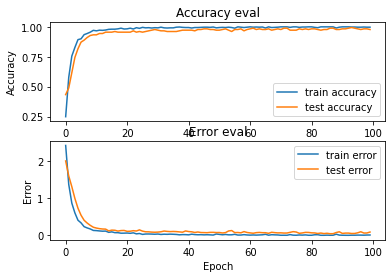

10/10 - 0s - loss: 0.1536 - accuracy: 0.9733

Test accuracy: 0.9733333587646484


In [44]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(0.25, 0.2) #0.25, 0.2

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)# epochs

# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

In [11]:
# pick a sample to predict from the test set
X_to_predict = X_test[10]
y_to_predict = y_test[10]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: Genres2\classical, Predicted label: ['Genres2\\classical']


In [12]:
# pick a sample to predict from the test set
X_to_predict = X_test[20]
y_to_predict = y_test[20]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: Genres2\rock, Predicted label: ['Genres2\\rock']


In [51]:
# pick a sample to predict from the test set
X_to_predict = X_test[30]
y_to_predict = y_test[30]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: Genres2\jazz, Predicted label: ['Genres2\\jazz']


In [52]:
# pick a sample to predict from the test set
X_to_predict = X_test[20]
y_to_predict = y_test[20]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: Genres2\jazz, Predicted label: ['Genres2\\jazz']


In [53]:
# pick a sample to predict from the test set
X_to_predict = X_test[1]
y_to_predict = y_test[1]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: Genres2\rock, Predicted label: ['Genres2\\rock']
